In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_excel('/content/drive/MyDrive/DS103 - Thu thập và tiền xử lý dữ liệu/dataset/data-da-gan-nhan-plus/final.xlsx')
datarsw = pd.read_excel('/content/drive/MyDrive/DS103 - Thu thập và tiền xử lý dữ liệu/dataset/data-da-gan-nhan-plus/final_remove_stop_word.xlsx')

In [ ]:
synonym_dict = pd.read_excel('/content/drive/MyDrive/DS103 - Thu thập và tiền xử lý dữ liệu/dataset/Quy đổi từ đồng nghĩa .xlsx')

In [ ]:
synonym_dict

,Word,Synonym
0,tiktok,"tt, Tik Tok, tóp tóp, toptop"
1,vinacon,vilacon
2,đơ,lag
3,liên kết,link
4,đéo,"méo, dell"
...,...,...
67,ghi nguồn,"nguồn, cre"
68,out trình,"ao trình, out chình, ao chình, out trình,..."
69,yeah,"yah, ya, ye"
70,phần trăm,%


In [ ]:
data = data.dropna(subset=['Comment'])
data = data.fillna(0)
data

,Pre_Comment,Comment,positive,negative,neutral,toxic,confused,funny,admirable,compassionate
0,Ai dịch hộ mình nó nói cái gì,ai dịch hộ mình nó nói cái gì,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Mở cửa cho connnn,mở cửa cho con,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"Y chang bé mèo bên mình, ban đầu gặp ko nói 1 ...",y chang bé mèo bên mình ban đầu gặp không nói ...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,nghèo nghèo,nghèo nghèo,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,câu đầu tiên là. mày làm sao,câu đầu tiên là mày làm sao,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10741,bà hàng xóm câm nín:),bà hàng xóm câm nín,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10742,"Trường top 34 ko nhận Jenny,Jenny vào hẳn trườ...",trường top không nhận jenny jenny vào hẳn trườ...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10743,mấy trường khác ko đậu được thì chị chơi top3,mấy trường khác không đậu được thì chị chơi top,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10744,ai chơi lại chị,ai chơi lại chị,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
datarsw = datarsw.dropna(subset=['Comment'])
datarsw = datarsw.fillna(0)
datarsw

,Pre_Comment,Comment,positive,negative,neutral,toxic,confused,funny,admirable,compassionate
0,Ai dịch hộ mình nó nói cái gì,dịch hộ,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Mở cửa cho connnn,cửa,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"Y chang bé mèo bên mình, ban đầu gặp ko nói 1 ...",y chang bé mèo ban đầu tiếp xúc ngao ngao bả,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,nghèo nghèo,nghèo nghèo,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,câu đầu tiên là. mày làm sao,câu đầu tiên mày,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10740,Bị trường 34 từ chối mà được trường top 3 nhận,trường chối trường top,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10741,bà hàng xóm câm nín:),hàng xóm câm nín,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10742,"Trường top 34 ko nhận Jenny,Jenny vào hẳn trườ...",trường top jenny jenny hẳn trường top,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10743,mấy trường khác ko đậu được thì chị chơi top3,mấy trường đậu top,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.describe()

,positive,negative,neutral,toxic,confused,funny,admirable,compassionate
count,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000
mean,0.284664,0.226968,0.485855,0.085799,0.112600,0.108133,0.070073,0.144705
std,0.451275,0.418891,0.499823,0.280081,0.316118,0.310563,0.255281,0.351820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

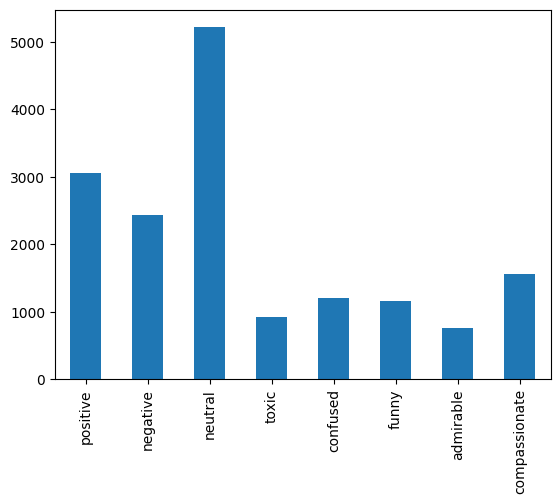

In [ ]:
import matplotlib.pyplot as plt
df = data.sum().drop(['Pre_Comment', 'Comment'], axis=0)

df.plot(kind='bar')

In [ ]:
data.columns

Index(['Pre_Comment', 'Comment', 'positive', 'negative', 'neutral', 'toxic',
       'confused', 'funny', 'admirable', 'compassionate'],
      dtype='object')

In [ ]:
!pip install transformers
!pip install torch
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels=7)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import torch
import numpy as np
from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW
from sklearn.metrics import classification_report


class SentimentModel(torch.nn.Module):
    def __init__(self, num_labels):
        super(SentimentModel, self).__init__()
        self.bert = AutoModel.from_pretrained("vinai/phobert-base")
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits


class SentimentDataset(Dataset):
    def __init__(self, comments, labels, tokenizer, max_length,):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, idx):
        comment = self.comments[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt",
        )
        input_ids = encoding["input_ids"].squeeze()
        attention_mask = encoding["attention_mask"].squeeze()
        label_tensor = torch.tensor(label, dtype=torch.float32)
        return input_ids, attention_mask, label_tensor

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")


num_labels = 8
model = SentimentModel(num_labels)

optimizer = AdamW(model.parameters(), lr=1e-5)

train_dataset = SentimentDataset(
    train_data["Comment"].values,
    train_data[['positive', 'negative', 'neutral', 'toxic', 'confused', 'funny', 'admirable', 'compassionate']].values,
    tokenizer,
    max_length=128,
)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

model.train()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
num_epochs = 8

for epoch in range(num_epochs):
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        loss = torch.nn.BCEWithLogitsLoss()(logits, labels)
        loss.backward()
        optimizer.step()

model.eval()
test_dataset = SentimentDataset(
    test_data["Comment"].values,
    test_data[['positive', 'negative', 'neutral', 'toxic', 'confused', 'funny', 'admirable', 'compassionate']].values,
    tokenizer,
    max_length=128,
)
test_dataloader = DataLoader(test_dataset, batch_size=16)

predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        logits = model(input_ids, attention_mask)
        predictions.extend(torch.sigmoid(logits).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

predictions = (np.array(predictions) > 0.5).astype(int)

target_names = ['positive', 'negative', 'neutral', 'toxic', 'confused', 'funny', 'admirable', 'compassionate']
print(classification_report(true_labels, predictions, target_names=target_names))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be remov

               precision    recall  f1-score   support

     positive       0.83      0.86      0.85       609
     negative       0.69      0.62      0.65       474
      neutral       0.81      0.80      0.80      1061
        toxic       0.75      0.51      0.61       189
     confused       0.69      0.74      0.72       237
        funny       0.62      0.68      0.65       235
    admirable       0.81      0.65      0.72       151
compassionate       0.76      0.81      0.78       302

    micro avg       0.77      0.75      0.76      3258
    macro avg       0.75      0.71      0.72      3258
 weighted avg       0.77      0.75      0.76      3258
  samples avg       0.76      0.76      0.74      3258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import torch
import numpy as np
from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW
from sklearn.metrics import classification_report

class SentimentModel(torch.nn.Module):
    def __init__(self, num_labels):
        super(SentimentModel, self).__init__()
        self.bert = AutoModel.from_pretrained("vinai/phobert-base")
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

class SentimentDataset(Dataset):
    def __init__(self, comments, labels, tokenizer, max_length,
                 #synonym_dict
                 ):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, idx):
        comment = self.comments[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt",
        )
        input_ids = encoding["input_ids"].squeeze()
        attention_mask = encoding["attention_mask"].squeeze()
        label_tensor = torch.tensor(label, dtype=torch.float32)
        return input_ids, attention_mask, label_tensor

train_data, test_data = train_test_split(datarsw, test_size=0.2, random_state=42)

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

num_labels = 8
model = SentimentModel(num_labels)


optimizer = AdamW(model.parameters(), lr=1e-5)

train_dataset = SentimentDataset(
    train_data["Comment"].values,
    train_data[['positive', 'negative', 'neutral', 'toxic', 'confused', 'funny', 'admirable', 'compassionate']].values,
    tokenizer,
    max_length=128,
)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

model.train()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
num_epochs = 8

for epoch in range(num_epochs):
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        loss = torch.nn.BCEWithLogitsLoss()(logits, labels)
        loss.backward()
        optimizer.step()

model.eval()
test_dataset = SentimentDataset(
    test_data["Comment"].values,
    test_data[['positive', 'negative', 'neutral', 'toxic', 'confused', 'funny', 'admirable', 'compassionate']].values,
    tokenizer,
    max_length=128,
)
test_dataloader = DataLoader(test_dataset, batch_size=16)

predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        logits = model(input_ids, attention_mask)
        predictions.extend(torch.sigmoid(logits).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

predictions = (np.array(predictions) > 0.5).astype(int)

target_names = ['positive', 'negative', 'neutral', 'toxic', 'confused', 'funny', 'admirable', 'compassionate']
print(classification_report(true_labels, predictions, target_names=target_names))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be remov

               precision    recall  f1-score   support

     positive       0.84      0.82      0.83       631
     negative       0.63      0.64      0.63       452
      neutral       0.79      0.75      0.77       981
        toxic       0.72      0.45      0.55       172
     confused       0.60      0.14      0.22       224
        funny       0.55      0.54      0.54       228
    admirable       0.68      0.64      0.66       158
compassionate       0.71      0.87      0.78       306

    micro avg       0.74      0.68      0.71      3152
    macro avg       0.69      0.61      0.62      3152
 weighted avg       0.73      0.68      0.69      3152
  samples avg       0.72      0.69      0.69      3152



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
torch.save(model.state_dict(), 'sentiment_model.pth')